In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
################################################################## this part is version 2
# this is done because we will be making pipeline 

In [40]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [42]:
df.shape

(3554, 18)

In [44]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [46]:
# we did this bcz it would be ease for the customer to give input on the basis of this
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [48]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [50]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [52]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [54]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [56]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 79,0.71,2,2,0,Under Construction,1295.0,0,0,0,0,0,1,Low,Mid Floor
1,flat,sector 62,9.95,4,6,3,Relatively New,3933.0,0,1,0,1,0,0,Medium,High Floor
2,house,sector 82,7.00,4,4,3+,Relatively New,3240.0,1,1,0,1,0,0,Low,Low Floor
3,flat,sector 48,4.30,4,5,3+,New Property,3444.0,1,1,0,1,0,1,Medium,Mid Floor
4,flat,sector 79,1.30,2,4,2,Relatively New,1223.0,0,0,0,0,0,1,Medium,Mid Floor


In [58]:
train_df.drop(columns=['pooja room','study room'],inplace=True)

In [60]:
train_df.drop(columns=['others'],inplace=True)

In [62]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 79,0.71,2,2,0,Under Construction,1295.0,0,0,1,Low,Mid Floor
1,flat,sector 62,9.95,4,6,3,Relatively New,3933.0,1,0,0,Medium,High Floor
2,house,sector 82,7.00,4,4,3+,Relatively New,3240.0,1,0,0,Low,Low Floor
3,flat,sector 48,4.30,4,5,3+,New Property,3444.0,1,0,1,Medium,Mid Floor
4,flat,sector 79,1.30,2,4,2,Relatively New,1223.0,0,0,1,Medium,Mid Floor


In [64]:
train_df.to_csv('gurgaon_properties_post_feature_selection_v2.csv',index=False)

In [ ]:
################################################################################## First version start

In [5]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [7]:
df.shape

(3554, 18)

In [9]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,supertech araville,sector 79,0.71,5521.0,2,2,0,9.0,Under Construction,1295.0,0,0,0,0,0,1,0
1,flat,pioneer araya,sector 62,9.95,20996.0,4,6,3,12.0,Relatively New,3933.0,0,1,0,1,0,0,138
2,house,independent,sector 82,7.00,21605.0,4,4,3+,1.0,Relatively New,3240.0,1,1,0,1,0,0,49
3,flat,vipul world floors,sector 48,4.30,13871.0,4,5,3+,4.0,New Property,3444.0,1,1,0,1,0,1,88
4,flat,godrej aria,sector 79,1.30,9623.0,2,4,2,3.0,Relatively New,1223.0,0,0,0,0,0,1,53


In [13]:
#we are dropping these things bcz we will not be taking these type of inputs from the user
train_df = df.drop(columns=['society','price_per_sqft'])

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 79,0.71,2,2,0,9.0,Under Construction,1295.0,0,0,0,0,0,1,0
1,flat,sector 62,9.95,4,6,3,12.0,Relatively New,3933.0,0,1,0,1,0,0,138
2,house,sector 82,7.00,4,4,3+,1.0,Relatively New,3240.0,1,1,0,1,0,0,49
3,flat,sector 48,4.30,4,5,3+,4.0,New Property,3444.0,1,1,0,1,0,1,88
4,flat,sector 79,1.30,2,4,2,3.0,Relatively New,1223.0,0,0,0,0,0,1,53


### luxury score

<Axes: ylabel='luxury_score'>

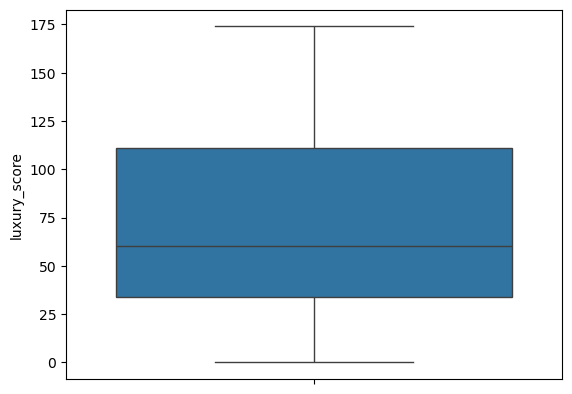

In [17]:
sns.boxplot(df['luxury_score'])

In [20]:
# we did this bcz it would be ease for the customer to give input on the basis of this
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [24]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [26]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 79,0.71,2,2,0,9.0,Under Construction,1295.0,0,0,0,0,0,1,0,Low
1,flat,sector 62,9.95,4,6,3,12.0,Relatively New,3933.0,0,1,0,1,0,0,138,Medium
2,house,sector 82,7.00,4,4,3+,1.0,Relatively New,3240.0,1,1,0,1,0,0,49,Low
3,flat,sector 48,4.30,4,5,3+,4.0,New Property,3444.0,1,1,0,1,0,1,88,Medium
4,flat,sector 79,1.30,2,4,2,3.0,Relatively New,1223.0,0,0,0,0,0,1,53,Medium


### floorNUM

<Axes: ylabel='floorNum'>

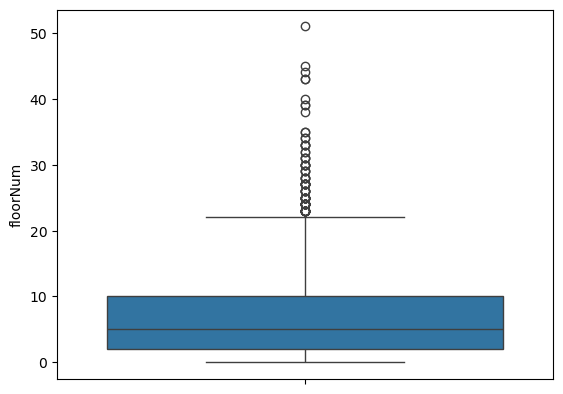

In [30]:
sns.boxplot(df['floorNum'])

In [32]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [34]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [36]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 79,0.71,2,2,0,9.0,Under Construction,1295.0,0,0,0,0,0,1,0,Low,Mid Floor
1,flat,sector 62,9.95,4,6,3,12.0,Relatively New,3933.0,0,1,0,1,0,0,138,Medium,High Floor
2,house,sector 82,7.00,4,4,3+,1.0,Relatively New,3240.0,1,1,0,1,0,0,49,Low,Low Floor
3,flat,sector 48,4.30,4,5,3+,4.0,New Property,3444.0,1,1,0,1,0,1,88,Medium,Mid Floor
4,flat,sector 79,1.30,2,4,2,3.0,Relatively New,1223.0,0,0,0,0,0,1,53,Medium,Mid Floor


In [38]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [42]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [44]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,89.0,2,2,0.0,4.0,1295.0,0,0,0,0,0,1,1.0,2.0
1,0.0,70.0,4,6,3.0,3.0,3933.0,0,1,0,1,0,0,2.0,0.0
2,1.0,93.0,4,4,4.0,3.0,3240.0,1,1,0,1,0,0,1.0,1.0
3,0.0,54.0,4,5,4.0,1.0,3444.0,1,1,0,1,0,1,2.0,2.0
4,0.0,89.0,2,4,2.0,3.0,1223.0,0,0,0,0,0,1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,14.0,2,2,2.0,3.0,73.0,0,0,0,0,0,1,1.0,1.0
3550,0.0,106.0,3,4,2.0,3.0,1350.0,0,0,0,0,0,0,2.0,0.0
3551,0.0,9.0,3,2,2.0,3.0,717.0,0,0,0,0,1,1,1.0,2.0
3552,0.0,1.0,1,1,1.0,0.0,565.0,0,0,0,0,0,1,1.0,0.0


In [46]:
y_label

0       0.71
1       9.95
2       7.00
3       4.30
4       1.30
        ... 
3549    1.60
3550    1.45
3551    0.51
3552    0.38
3553    1.73
Name: price, Length: 3554, dtype: float64

## checking importance of various features(FS)

### Technique 1 - Correlation Analysis

<Axes: >

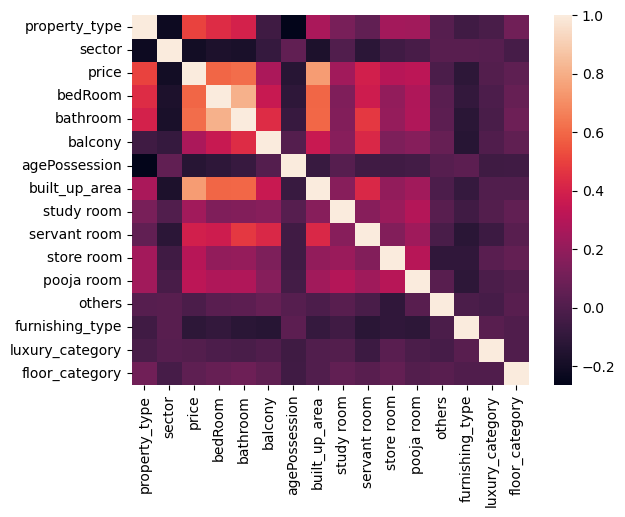

In [51]:
sns.heatmap(data_label_encoded.corr())

In [53]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201678
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.132989
6,built_up_area,0.744312
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique 2 - Random Forest Feature Importance


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.647674
0,property_type,0.105378
1,sector,0.102016
3,bathroom,0.026721
2,bedRoom,0.022838
8,servant room,0.018492
5,agePossession,0.014138
4,balcony,0.012405
7,study room,0.010940
12,furnishing_type,0.009469


### Technique 3 - Gradient Boosting Feature importances

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.684722
0,property_type,0.104311
1,sector,0.102562
2,bedRoom,0.033272
3,bathroom,0.033096
8,servant room,0.020395
9,store room,0.008450
5,agePossession,0.004386
7,study room,0.003621
12,furnishing_type,0.001956


### Technique 4 - Permutation Importance

In [62]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.681081
0,property_type,0.222545
1,sector,0.151546
3,bathroom,0.018754
8,servant room,0.015212
2,bedRoom,0.007681
4,balcony,0.005350
14,floor_category,0.004066
7,study room,0.003518
13,luxury_category,0.002480


### Technique 5 - LASSO

In [65]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.511712
0,property_type,0.754590
3,bathroom,0.283627
9,store room,0.196714
8,servant room,0.178190
7,study room,0.175368
10,pooja room,0.090199
13,luxury_category,0.041271
2,bedRoom,0.024481
5,agePossession,-0.000000


### Technique 6 - RFE

In [68]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.645876
0,property_type,0.105958
1,sector,0.100213
3,bathroom,0.026910
2,bedRoom,0.023757
8,servant room,0.021161
5,agePossession,0.014054
4,balcony,0.012195
12,furnishing_type,0.009803
7,study room,0.009550


### Technique 7 - Linear Regression Weights

In [74]:
from sklearn.linear_model import LinearRegression

In [76]:

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.514377
0,property_type,0.753157
3,bathroom,0.290928
9,store room,0.201171
8,servant room,0.187856
7,study room,0.184085
10,pooja room,0.093539
13,luxury_category,0.051912
2,bedRoom,0.027603
5,agePossession,-0.002579


### Technique 8 - SHAP


In [79]:
!pip install shap

   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/531.1 kB 660.6 kB/s eta 0:00:01
   ---------- ----------------------------- 143.4/531.1 kB 2.1 MB/s eta 0:00:01
   ----------------- ---------------------- 235.5/531.1 kB 2.1 MB/s eta 0:00:01
   ------------------------------ --------- 399.4/531.1 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  522.2/531.1 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 531.1/531.1 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   -------------------- ------------------- 153.6/301.8 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [81]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.17238149, -0.23138947, -0.06552593, ..., -0.01329088,
        -0.00467167, -0.01238455],
       [-0.38182196,  1.0988599 ,  0.06416514, ...,  0.06790118,
         0.01753679, -0.0038946 ],
       [ 1.10807825, -1.17354885, -0.06433456, ..., -0.01356943,
        -0.00507444,  0.053155  ],
       ...,
       [-0.17535482, -0.14496619, -0.01053985, ..., -0.00834988,
        -0.01091004, -0.00460237],
       [-0.17832877, -0.24765962, -0.0390286 , ..., -0.00839946,
        -0.01052323,  0.02528513],
       [-0.21773847, -0.26688065, -0.0044009 , ...,  0.0135255 ,
         0.04472784,  0.01273466]])

In [83]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.243012
0,property_type,0.473080
1,sector,0.378414
3,bathroom,0.140856
8,servant room,0.089662
2,bedRoom,0.054810
4,balcony,0.037624
5,agePossession,0.025705
7,study room,0.024323
14,floor_category,0.024004


In [85]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [87]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201678,0.102016,0.102562,0.151546,-0.042690,0.100213,-0.051285,0.378414
bedRoom,0.591289,0.022838,0.033272,0.007681,0.024481,0.023757,0.027603,0.054810
bathroom,0.609777,0.026721,0.033096,0.018754,0.283627,0.026910,0.290928,0.140856
balcony,0.269637,0.012405,0.001677,0.005350,-0.029137,0.012195,-0.052109,0.037624
agePossession,-0.132989,0.014138,0.004386,-0.000068,-0.000000,0.014054,-0.002579,0.025705
built_up_area,0.744312,0.647674,0.684722,0.681081,1.511712,0.645876,1.514377,1.243012
study room,0.242955,0.010940,0.003621,0.003518,0.175368,0.009550,0.184085,0.024323
servant room,0.391930,0.018492,0.020395,0.015212,0.178190,0.021161,0.187856,0.089662
store room,0.305677,0.007667,0.008450,-0.002155,0.196714,0.007632,0.201171,0.014848


In [89]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [91]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.065731,0.114033,0.114506,0.171577,-0.018022,0.112090,-0.021760,0.180810
bedRoom,0.192713,0.025528,0.037147,0.008696,0.010335,0.026572,0.011712,0.026189
bathroom,0.198738,0.029869,0.036951,0.021233,0.119733,0.030099,0.123438,0.067302
balcony,0.087880,0.013866,0.001872,0.006057,-0.012300,0.013640,-0.022110,0.017977
agePossession,-0.043344,0.015803,0.004897,-0.000077,-0.000000,0.015719,-0.001094,0.012282
built_up_area,0.242586,0.723964,0.764464,0.771105,0.638168,0.722423,0.642538,0.593923
study room,0.079184,0.012228,0.004043,0.003983,0.074031,0.010682,0.078106,0.011622
servant room,0.127738,0.020670,0.022771,0.017223,0.075223,0.023668,0.079706,0.042841
store room,0.099626,0.008570,0.009434,-0.002439,0.083043,0.008537,0.085355,0.007095


In [93]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.715176
sector             0.138603
bathroom           0.037091
servant room       0.025435
bedRoom            0.024826
balcony            0.010682
agePossession      0.009725
study room         0.008512
furnishing_type    0.006548
store room         0.006239
floor_category     0.006124
luxury_category    0.005428
pooja room         0.003430
others             0.002183
dtype: float64

In [95]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,89.0,2,2,0.0,4.0,1295.0,0,0,0,0,0,1,1.0,2.0
1,0.0,70.0,4,6,3.0,3.0,3933.0,0,1,0,1,0,0,2.0,0.0
2,1.0,93.0,4,4,4.0,3.0,3240.0,1,1,0,1,0,0,1.0,1.0
3,0.0,54.0,4,5,4.0,1.0,3444.0,1,1,0,1,0,1,2.0,2.0
4,0.0,89.0,2,4,2.0,3.0,1223.0,0,0,0,0,0,1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,14.0,2,2,2.0,3.0,73.0,0,0,0,0,0,1,1.0,1.0
3550,0.0,106.0,3,4,2.0,3.0,1350.0,0,0,0,0,0,0,2.0,0.0
3551,0.0,9.0,3,2,2.0,3.0,717.0,0,0,0,0,1,1,1.0,2.0
3552,0.0,1.0,1,1,1.0,0.0,565.0,0,0,0,0,0,1,1.0,0.0


In [97]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [99]:
scores.mean()

0.8081725951860064

In [101]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [103]:
scores.mean()

0.806866295849338

In [111]:
# as we can see our model using ['pooja room', 'study room', 'others'] cols and without these cols the result is almost similar 
# hence we will be deleting these rows

In [113]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [115]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [109]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,89.0,2,2,0.0,4.0,1295.0,0,0,1,1.0,2.0,0.71
1,0.0,70.0,4,6,3.0,3.0,3933.0,1,0,0,2.0,0.0,9.95
2,1.0,93.0,4,4,4.0,3.0,3240.0,1,0,0,1.0,1.0,7.00
3,0.0,54.0,4,5,4.0,1.0,3444.0,1,0,1,2.0,2.0,4.30
4,0.0,89.0,2,4,2.0,3.0,1223.0,0,0,1,2.0,2.0,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,14.0,2,2,2.0,3.0,73.0,0,0,1,1.0,1.0,1.60
3550,0.0,106.0,3,4,2.0,3.0,1350.0,0,0,0,2.0,0.0,1.45
3551,0.0,9.0,3,2,2.0,3.0,717.0,0,0,1,1.0,2.0,0.51
3552,0.0,1.0,1,1,1.0,0.0,565.0,0,0,1,1.0,0.0,0.38
